In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

from sklearn.utils import shuffle

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from tensorflow.examples.tutorials.mnist import input_data


In [41]:
def get_next_mnist_balanced_batch(batch_size):

    next_x, next_y = data.train.next_batch(1)
    x1, y1 = np.tile(next_x, (batch_size, 1)), np.tile(next_y, (batch_size, 1))
        
    good_x, good_y = [], [] 
    
    while(len(good_x) < batch_size/2) :
        x, y = data.train.next_batch(1)
        if y == next_y:
            good_x.append(x)
            good_y.append(y)
            
    bad_x, bad_y = [], []
    
    while(len(bad_x) < batch_size/2):
        x,y = data.train.next_batch(1)
        if y != next_y:
            bad_x.append(x)
            bad_y.append(y)
          
    
    x2, y2 = np.concatenate((good_x, bad_x)), np.concatenate((good_y, bad_y))
   
    x1 = x1.reshape(-1,28,28,1)
    x2 = x2.reshape(-1,28,28,1)
    y = (y1 == y2).astype(float) 
    
    return x1, x2, y, y1, y2

In [42]:
BATCH_SIZE = 4
TEST_LOOPS = 10

data = input_data.read_data_sets("./MNIST_data/")

accuracies = []

Extracting ./MNIST_data/train-images-idx3-ubyte.gz
Extracting ./MNIST_data/train-labels-idx1-ubyte.gz
Extracting ./MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ./MNIST_data/t10k-labels-idx1-ubyte.gz


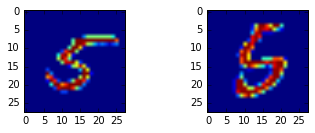

Prediction= [ True]


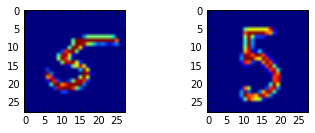

Prediction= [ True]


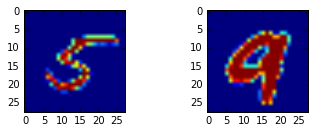

Prediction= [False]


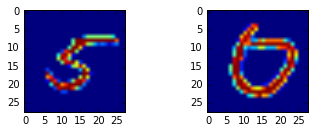

Prediction= [False]


In [50]:
trained_graph_path = "./Trained_Model/mnist_trained_graph.pb"

with tf.Graph().as_default() as this_graph:
    trained_graph = tf.GraphDef()
    with open(trained_graph_path, "rb") as f:
        trained_graph.ParseFromString(f.read())
        tf.import_graph_def(trained_graph, name="")

    with tf.Session() as sess:
        
        for i in range(TEST_LOOPS):
            x1, x2, y, _, _ = get_next_mnist_balanced_batch(BATCH_SIZE)

            images_left = sess.graph.get_tensor_by_name("inputs_section/images_left:0")
            images_right = sess.graph.get_tensor_by_name("inputs_section/images_right:0")
            output_node = sess.graph.get_tensor_by_name("computation_section/output_node:0")

            predictions = sess.run(output_node, feed_dict={images_left:x1, images_right:x2})
            accuracies.append((y == predictions).astype(float))
            
            if i == TEST_LOOPS-1:
                for i in range(BATCH_SIZE):
                    plt.figure(1)
                    plt.subplot(221)
                    plt.imshow(x1[i].squeeze())

                    plt.subplot(222)
                    plt.imshow(x2[i].squeeze())
                    plt.show()
                
                    print("Prediction= " + str(predictions[i]))
                

            
        

In [47]:
accuracy = np.mean(accuracies)
print("Accuracy= " + str(accuracy))

Accuracy= 0.9
